In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
from scipy.ndimage.filters import maximum_filter, minimum_filter
import scipy.ndimage as ndimage
from ecmwf.opendata import Client

In [2]:
def plot_maxmin_points_0(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):

        txt2 = ax.annotate('\n' + str(int(data[mxy[i], mxx[i]])), xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]),
                           xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), 
                color=color, size=9, clip_on=True, annotation_clip=True, fontweight='normal', 
                           horizontalalignment='center', verticalalignment='top',
                transform=ccrs.PlateCarree())  

In [3]:
date=20231115
time=0
step=18

In [4]:
parameters0 = ['10u', '10v']
filename0 = 'wind.grib'
parameters1 = ['2t']
filename1 = 'tpa.grib'

In [5]:
client = Client()
client.retrieve(
    date=date, # data da inicialização do modelo
    time=time,       # hora da rodada do modelo
    step=step,      # hora analisada
    stream="oper",
    type="fc",
    levtype="sfc",
    param=parameters0,
    target=filename0)

client = Client()
client.retrieve(
    date=date, # data da inicialização do modelo
    time=time,       # hora da rodada do modelo
    step=step,      # hora analisada
    stream="oper",
    type="fc",
    levtype="sfc",
    param=parameters1,
    target=filename1)

20231115000000-18h-oper-fc.grib2:   0%|          | 0.00/710k [00:00<?, ?B/s]

20231115000000-18h-oper-fc.grib2:   0%|          | 0.00/279k [00:00<?, ?B/s]

In [6]:
ds0=xr.open_dataset(filename0, engine="cfgrib")
ds1=xr.open_dataset(filename1, engine="cfgrib")

Ignoring index file 'wind.grib.923a8.idx' older than GRIB file
Ignoring index file 'tpa.grib.923a8.idx' older than GRIB file


In [7]:
u10=ds0['u10']
v10=ds0['v10']
lon=ds0['longitude']
lat=ds0['latitude']

t2=ds1['t2m']-273.15
lon=ds1['longitude']
lat=ds1['latitude']

In [8]:
t2P=ndimage.gaussian_filter(t2,sigma=.5,order=0)

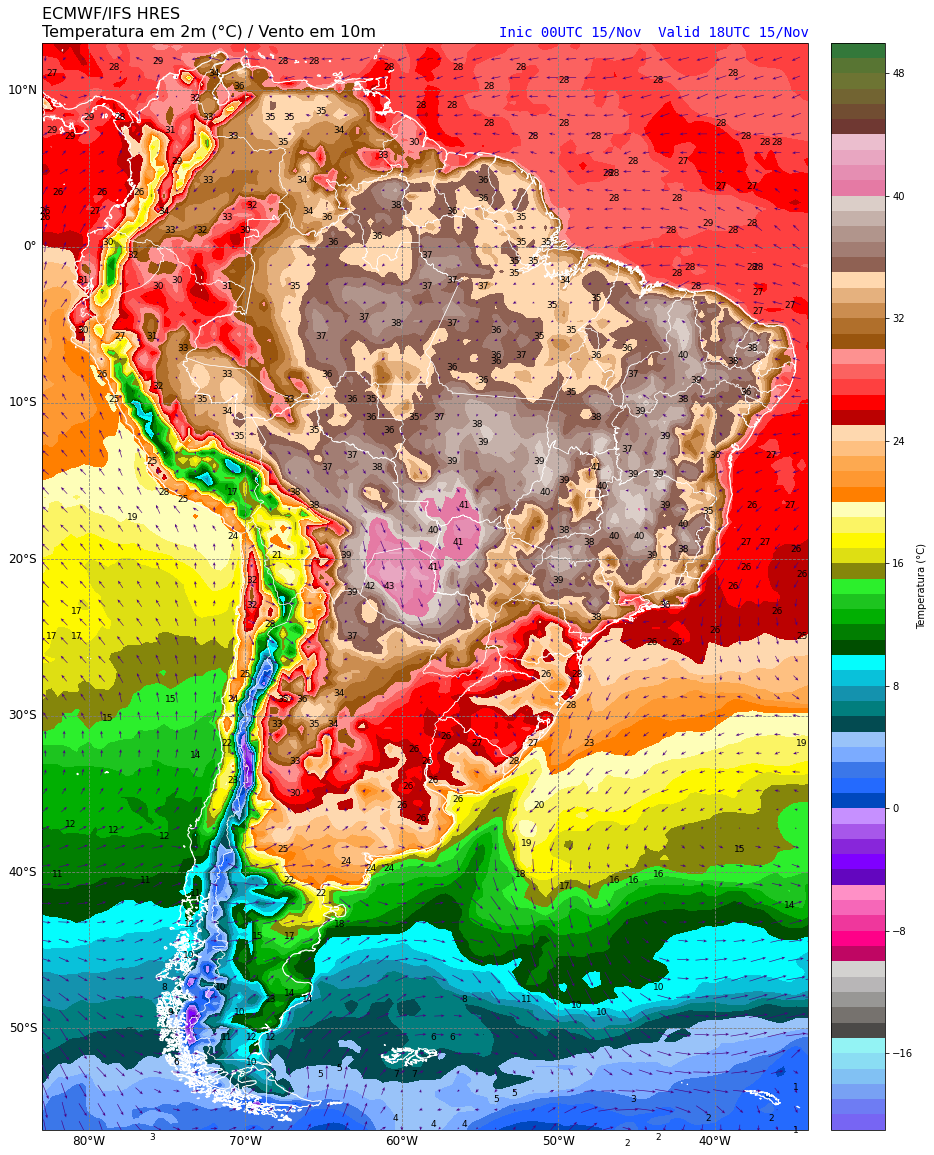

In [9]:
lon,lat=np.meshgrid(t2.longitude,t2.latitude)
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m",color='white')
ax.set_extent([-83,-34,12,-54])
#ax.set_extent([-58,-47,-34,-22])
cores=['#7765f3','#6e7cf3','#78a1f3','#81c1f3','#8addf3','#93f3f4','#4b4947','#76726e','#989795','#b8b6b7','#d3d2d0','#bf0663',
       '#fe0188','#ef379c','#f667b8','#ff90c6','#6306bf','#7f00ff','#8826da','#a757ea','#c690ff','#0048be','#246afe','#3b77e9',
       '#7babff','#99c3f9','#034b51','#017e7e','#1492ae','#09c1da','#04fdfd','#004f00','#017e01','#01af02','#1dc41f','#2cef2c',
       '#85860b','#dedf13','#fef800','#fbf464','#fefeb8','#ff7f00','#fe9831','#fda950','#fec081','#fed8af','#bb0101','#fe0000',
       '#fe4040','#fb6260','#fd9190','#99550e','#b06f2b','#cb8d50','#e5b17e','#ffd8af','#8f6153','#a27d73','#b1958c','#c5b1aa',
       '#dbcec8','#e57aa4','#e58eb2','#e8a6c1','#ebbece','#6f3832','#714d32','#726432','#6d7433','#587533','#33783a']
levels=[-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,
        18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]


im=ax.contourf(lon,lat,t2P,levels=levels,
               colors=cores,
               transform=ccrs.PlateCarree())

wind_slice = (slice(None, None, 3), slice(None, None, 3))
im1=plt.quiver(lon[wind_slice],lat[wind_slice],u10[wind_slice],v10[wind_slice],
              color='indigo',width=0.0008,scale=600,
              headwidth=5,headlength=6,pivot='middle',zorder=3)

plot_maxmin_points_0(lon,lat,t2,'max',5,symbol='máx',
                   color='k',
                   transform=ccrs.PlateCarree())

states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/10/ne_10m_admin_0_countries.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='white',facecolor='none',linestyle='-',linewidth=.5)
states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/BR/BR_UF_2022.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='white',facecolor='none',linestyle='-',linewidth=.5)

g1=ax.gridlines(crs=ccrs.PlateCarree(),linestyle='--',color='gray',draw_labels=True)
g1.right_labels=False
g1.top_labels=False
g1.yformatter=LATITUDE_FORMATTER
g1.xformatter=LONGITUDE_FORMATTER
g1.ylabel_style={'size':12,'color':'black'}
g1.xlabel_style={'size':12,'color':'black'}

#cbar=plt.colorbar(im,ax=ax,pad=0.02,fraction=0.044,orientation='horizontal')
cbar=plt.colorbar(im,ax=ax,pad=0.02,fraction=0.049,orientation='vertical')
cbar.set_label(label='Temperatura (°C)',size=10)
plt.title('ECMWF/IFS HRES\nTemperatura em 2m (°C) / Vento em 10m',fontsize=16,loc='left')
plt.title(ds0.time.dt.strftime('Inic %HUTC %d/%b  ').item()+ds0.valid_time.dt.strftime('Valid %HUTC %d/%b').item(),
          fontsize=14,loc='right',color='blue',fontweight='normal',fontfamily='monospace')
plt.savefig('T2m_V10m'+ds0.valid_time.dt.strftime('%HUTC_%d_%b').item()+'.jpeg',dpi=300,bbox_inches='tight')